# **Example**

Using `pangpuriye` library in OCR task. 

[**IMPORTANT**] All libraries below will be imported after you import `pangpuriye` :
 - python = "^3.6"
 - PyYAML = "^5.3.1"
 - opencv-python = "^4.5.1"
 - detecto = "^1.2.0"
 - easyocr = "1.2.1"
 - matplotlib = "^3.3.3"
 - python-Levenshtein = "0.12.0"
 - pdf2image = "1.14.0"
 - numpy = "1.19.0"

In [1]:
from pangpuriye.ai.ocr import OCR
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

ocr = OCR()

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


## **Requirement**

We use document from "คณะวิทยาการจัดการ มหาวิทยาลัยราชภัฏกำแพงเพชร" via public network.

Let's checking **received month** of the document below...

In [2]:
fname, pages = ocr.pdf2image('https://fms.kpru.ac.th/wp-content/uploads/2020/03/290.pdf')

Checking the first page of the document...

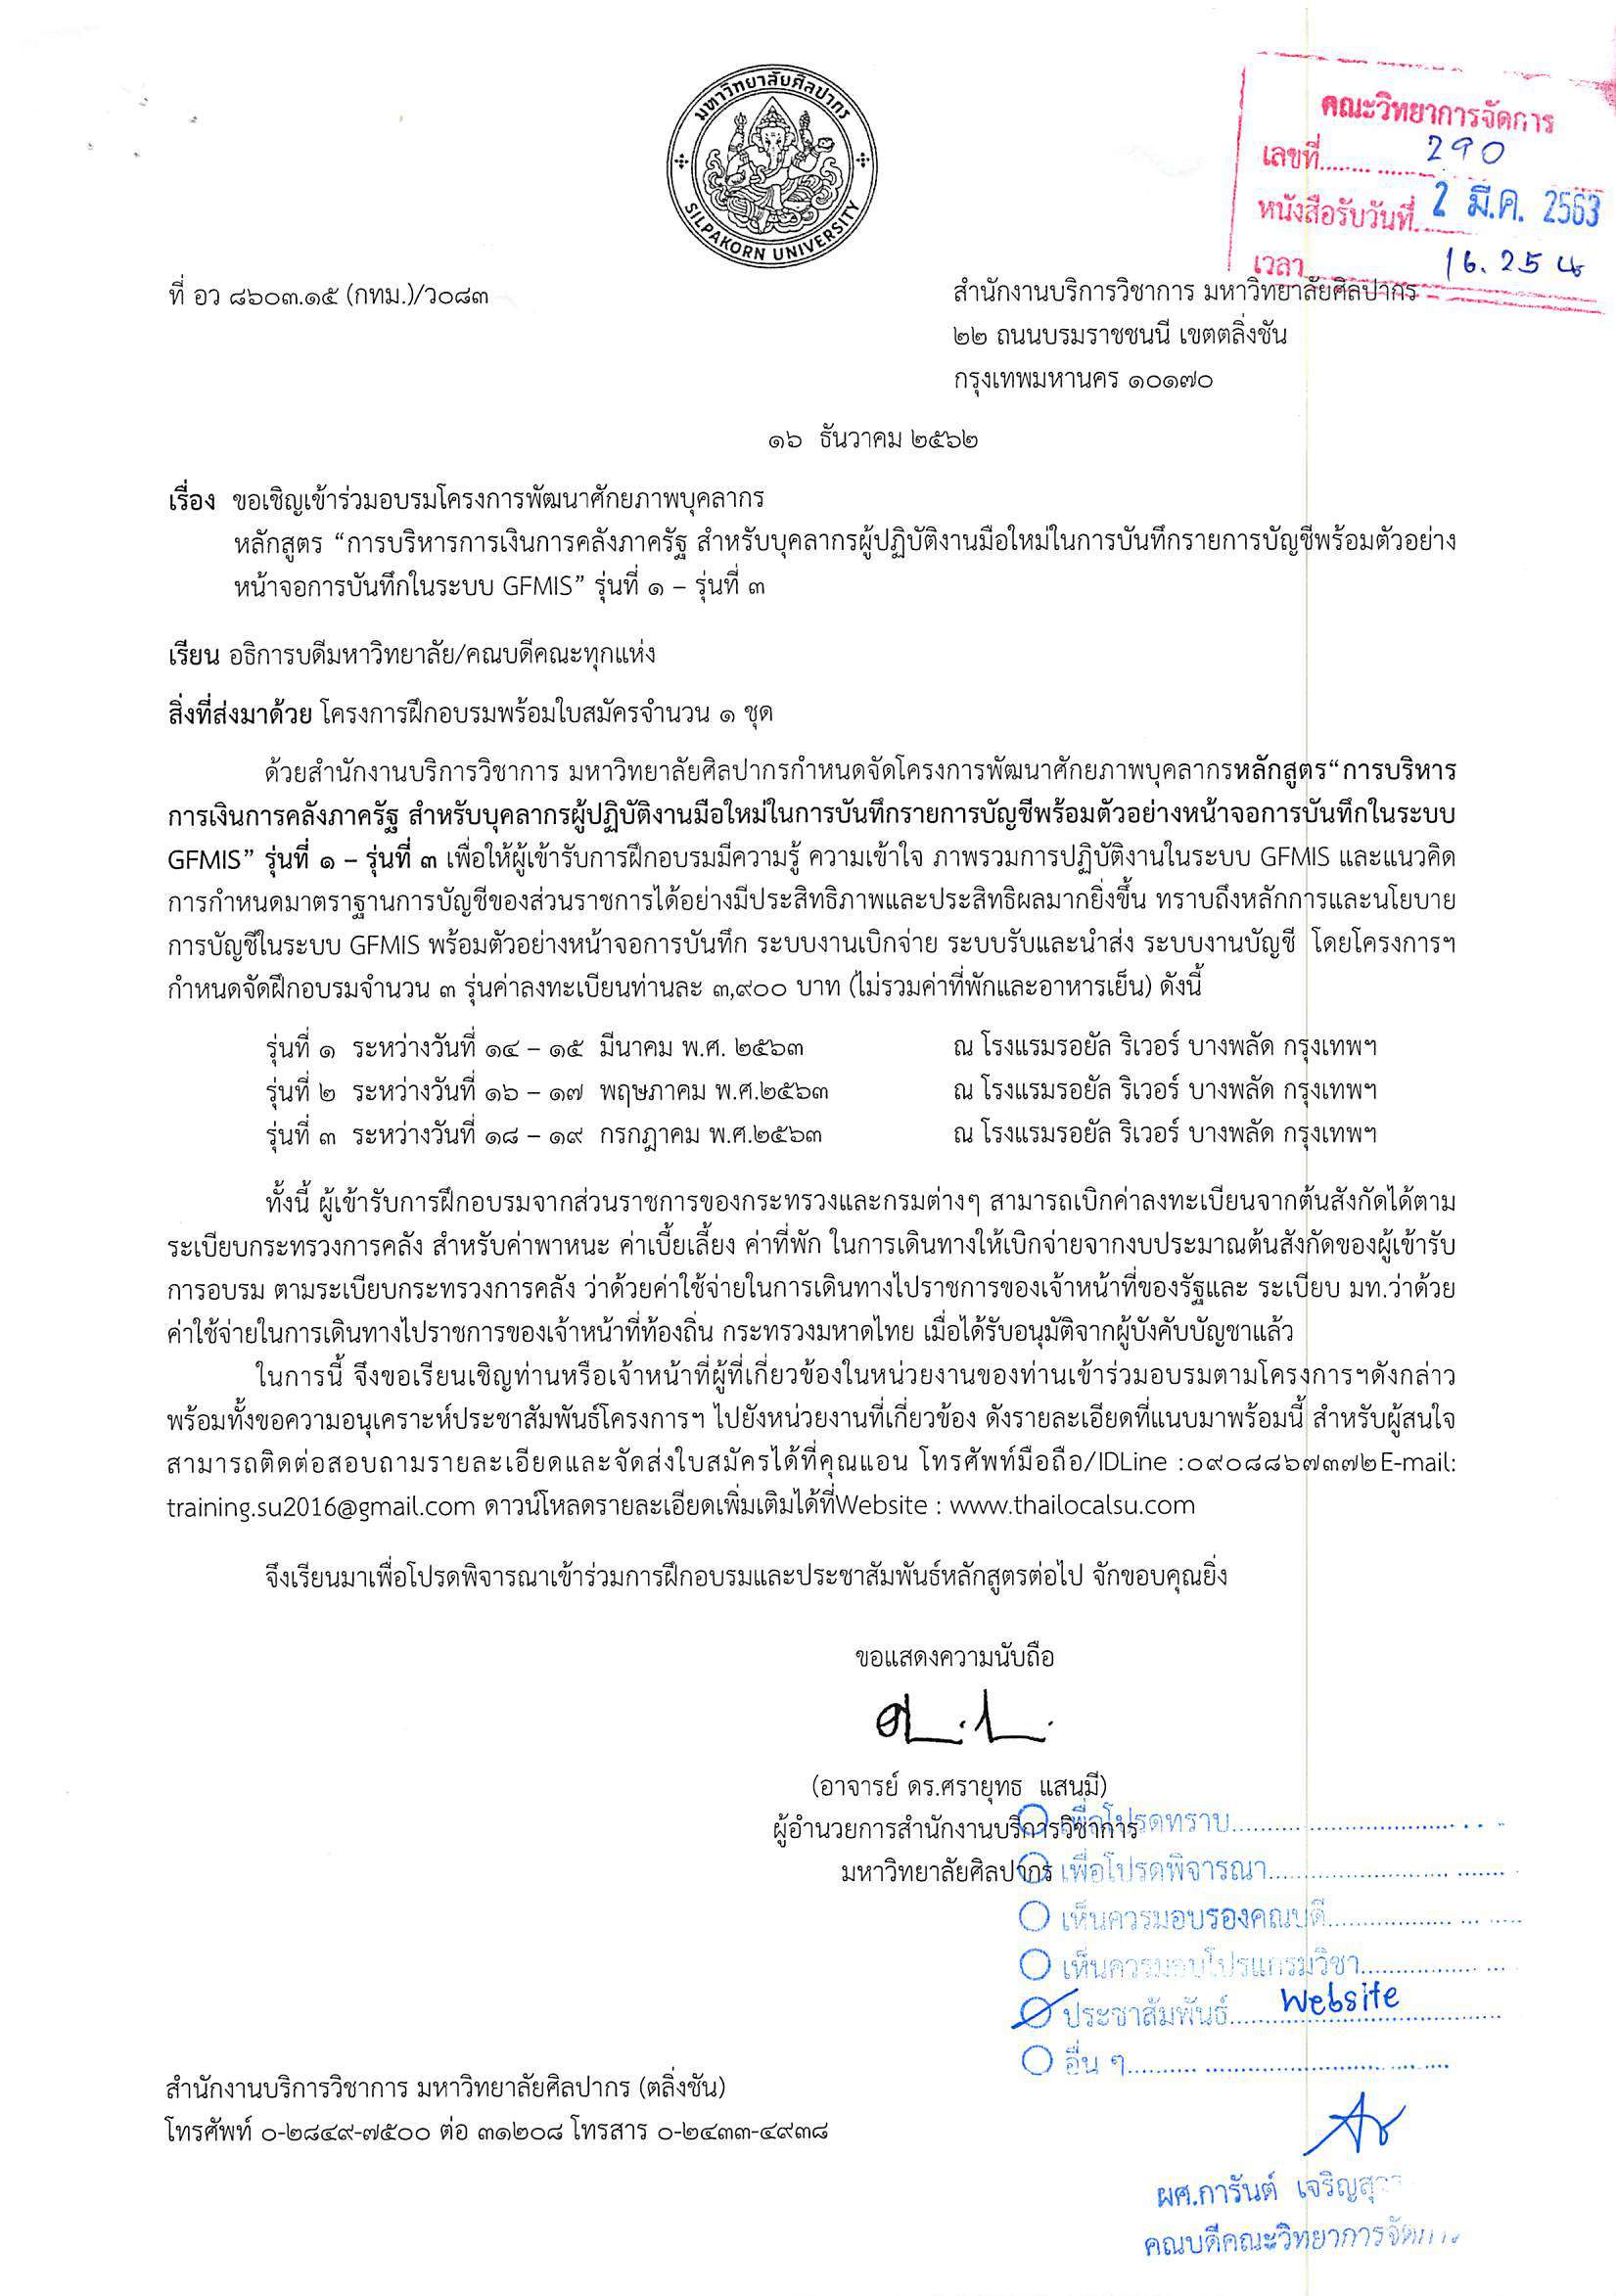

In [3]:
pages[0]

## **Capture content**

We set interesting scope to :

In [4]:
min_height = 0
max_height = 500
min_width = 1200
max_width = 2000

Checking...

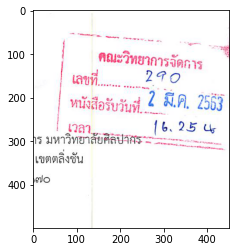

In [6]:
test = np.array(pages[0])[min_height:max_height, min_width:max_width]
plt.imshow(test)

Capture content by specific color range of the content :

In [11]:
mask_path = ocr.crop_in_area(pages[0], \
                 min_width=min_width, max_width=max_width, min_height=min_height, max_height=max_height, \
                 fromColorRange=np.array([0,10,120]), toColorRange=np.array([15, 255, 255]), \
                 filename=fname, fpath=os.getcwd())

print(mask_path)

/Users/patharanor/Projects/pangpuriye/python/pangpuriye/290.pdf.png


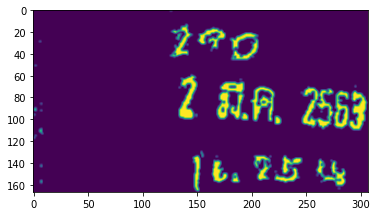

In [12]:
ocr.imshow(mask_path)

In [13]:
find_doc_number = ocr.reader.readtext(mask_path, allowlist ='0123456789')
find_doc_number

[([[119, 9], [214, 9], [214, 54], [119, 54]], '179', 0.48934206366539),
 ([[122, 53], [307, 53], [307, 118], [122, 118]], '1852', 0.01486129593104124),
 ([[138, 124], [296, 124], [296, 167], [138, 167]],
  '675',
  0.18237583339214325)]

## **Parse content**

**Received month** is in element number 2, we set alphabets scope in 'มคกพมีคเมยพคมิยกคสคกยตคพยธค' :

In [14]:
find_month = ocr.reader.readtext(mask_path, allowlist ='มคกพมีคเมยพคมิยกคสคกยตคพยธค')
find_month

[([[119, 9], [214, 9], [214, 54], [119, 54]], 'เ', 0.3739265501499176),
 ([[122, 53], [307, 53], [307, 118], [122, 118]],
  'เมีคกม',
  0.31029853224754333),
 ([[138, 124], [296, 124], [296, 167], [138, 167]], 'ต', 0.07275743782520294)]

In [15]:
find_month[1]

([[122, 53], [307, 53], [307, 118], [122, 118]], 'เมีคกม', 0.31029853224754333)

In [16]:
pred_month = find_month[1][1]

In [17]:
month = ocr.get_month(pred_month, 'th')

[0.4, 0.2, 0.5454545454545454, 0.36363636363636365, 0.36363636363636365, 0.18181818181818182, 0.2, 0.2, 0.2, 0.2, 0.0, 0.2]


In [18]:
month

'มี.ค.'